# CAPSTONE PROJECT - HEALTHCARE

# Project Task: Week 1
### Data Exploration:

### 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

     • Glucose

     • BloodPressure

     • SkinThickness

     • Insulin

     • BMI

### DESCRIPTIVE ANALYSIS

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\Project 2\\Healthcare - Diabetes\\health care diabetes.csv", encoding='utf-8')

In [15]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

**Insights from Descriptive Analysis**

There are 768 observations of 9 variables. Independent variables are Pregnancies, Glucose, Blood Pressure, Insulin, BMI and Diabetes Pedigree Function. Age is Outcome Variable. Average Age of Patients are 33.24 with minimum being 21 and maximum 81. Avg. value of independent variables are Preg = 3.845052, Glucose = 120.894531, BP = 69.105469, ST=20.536458, Insulin = 79.799479, BMI = 31.992578, DPF = 0.471876. 


### **2. Visually explore these variables using histograms. Treat the missing values accordingly.**

In [19]:
plt.hist(df['Glucose'])

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

In [20]:
df['Glucose'].value_counts().head(7)

100    17
99     17
129    14
125    14
111    14
106    14
95     13
Name: Glucose, dtype: int64

Replacing the zero values with the mean of the column.

In [21]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

In [22]:
plt.hist(df['BMI'])

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <a list of 10 Patch objects>)

In [23]:
df['BMI'].value_counts().head(7)

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
32.4    10
32.8     9
Name: BMI, dtype: int64

Replacing the zero values with the mean of the column.

In [24]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [25]:
plt.hist(df['BloodPressure'])

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <a list of 10 Patch objects>)

In [26]:
df['BloodPressure'].value_counts().head(7)

70    57
74    52
68    45
78    45
72    44
64    43
80    40
Name: BloodPressure, dtype: int64

Replacing the zero values with the mean of the column.

In [27]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

In [28]:
plt.hist(df['SkinThickness'])

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

In [29]:
df['SkinThickness'].value_counts().head(7)

0     227
32     31
30     27
27     23
23     22
33     20
18     20
Name: SkinThickness, dtype: int64

Replacing the zero values with the mean of the column.

In [30]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <a list of 10 Patch objects>)

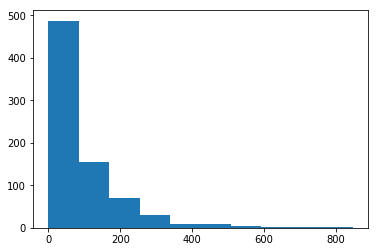

In [31]:
plt.hist(df['Insulin'])

In [32]:

df['Insulin'].value_counts().head(7)

0      374
105     11
140      9
130      9
120      8
100      7
94       7
Name: Insulin, dtype: int64

Replacing the zero values with the mean of the column.

In [33]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

In [34]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Project Task: Week 2

### 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

As both class is balanced, there is no need not to perform any sampling method to maintain the balance between both classes. So this data is directly used in training and testing. Meanwhile during Model Validation, we also need not worry about ROC Curve because data is not imbalanced.

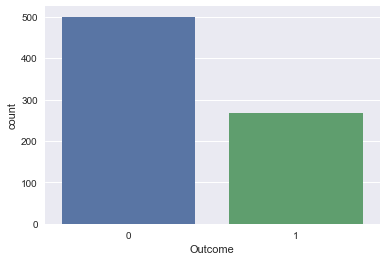

In [35]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Outcome", data=df)

### 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

The scatter plot showed no strong multi collinearity among features, but between skin thickness and BMI, Pregnancies and age it looks like there is small chance of positive correlation.

Text(0.5,1,'Scatter plot between variables')

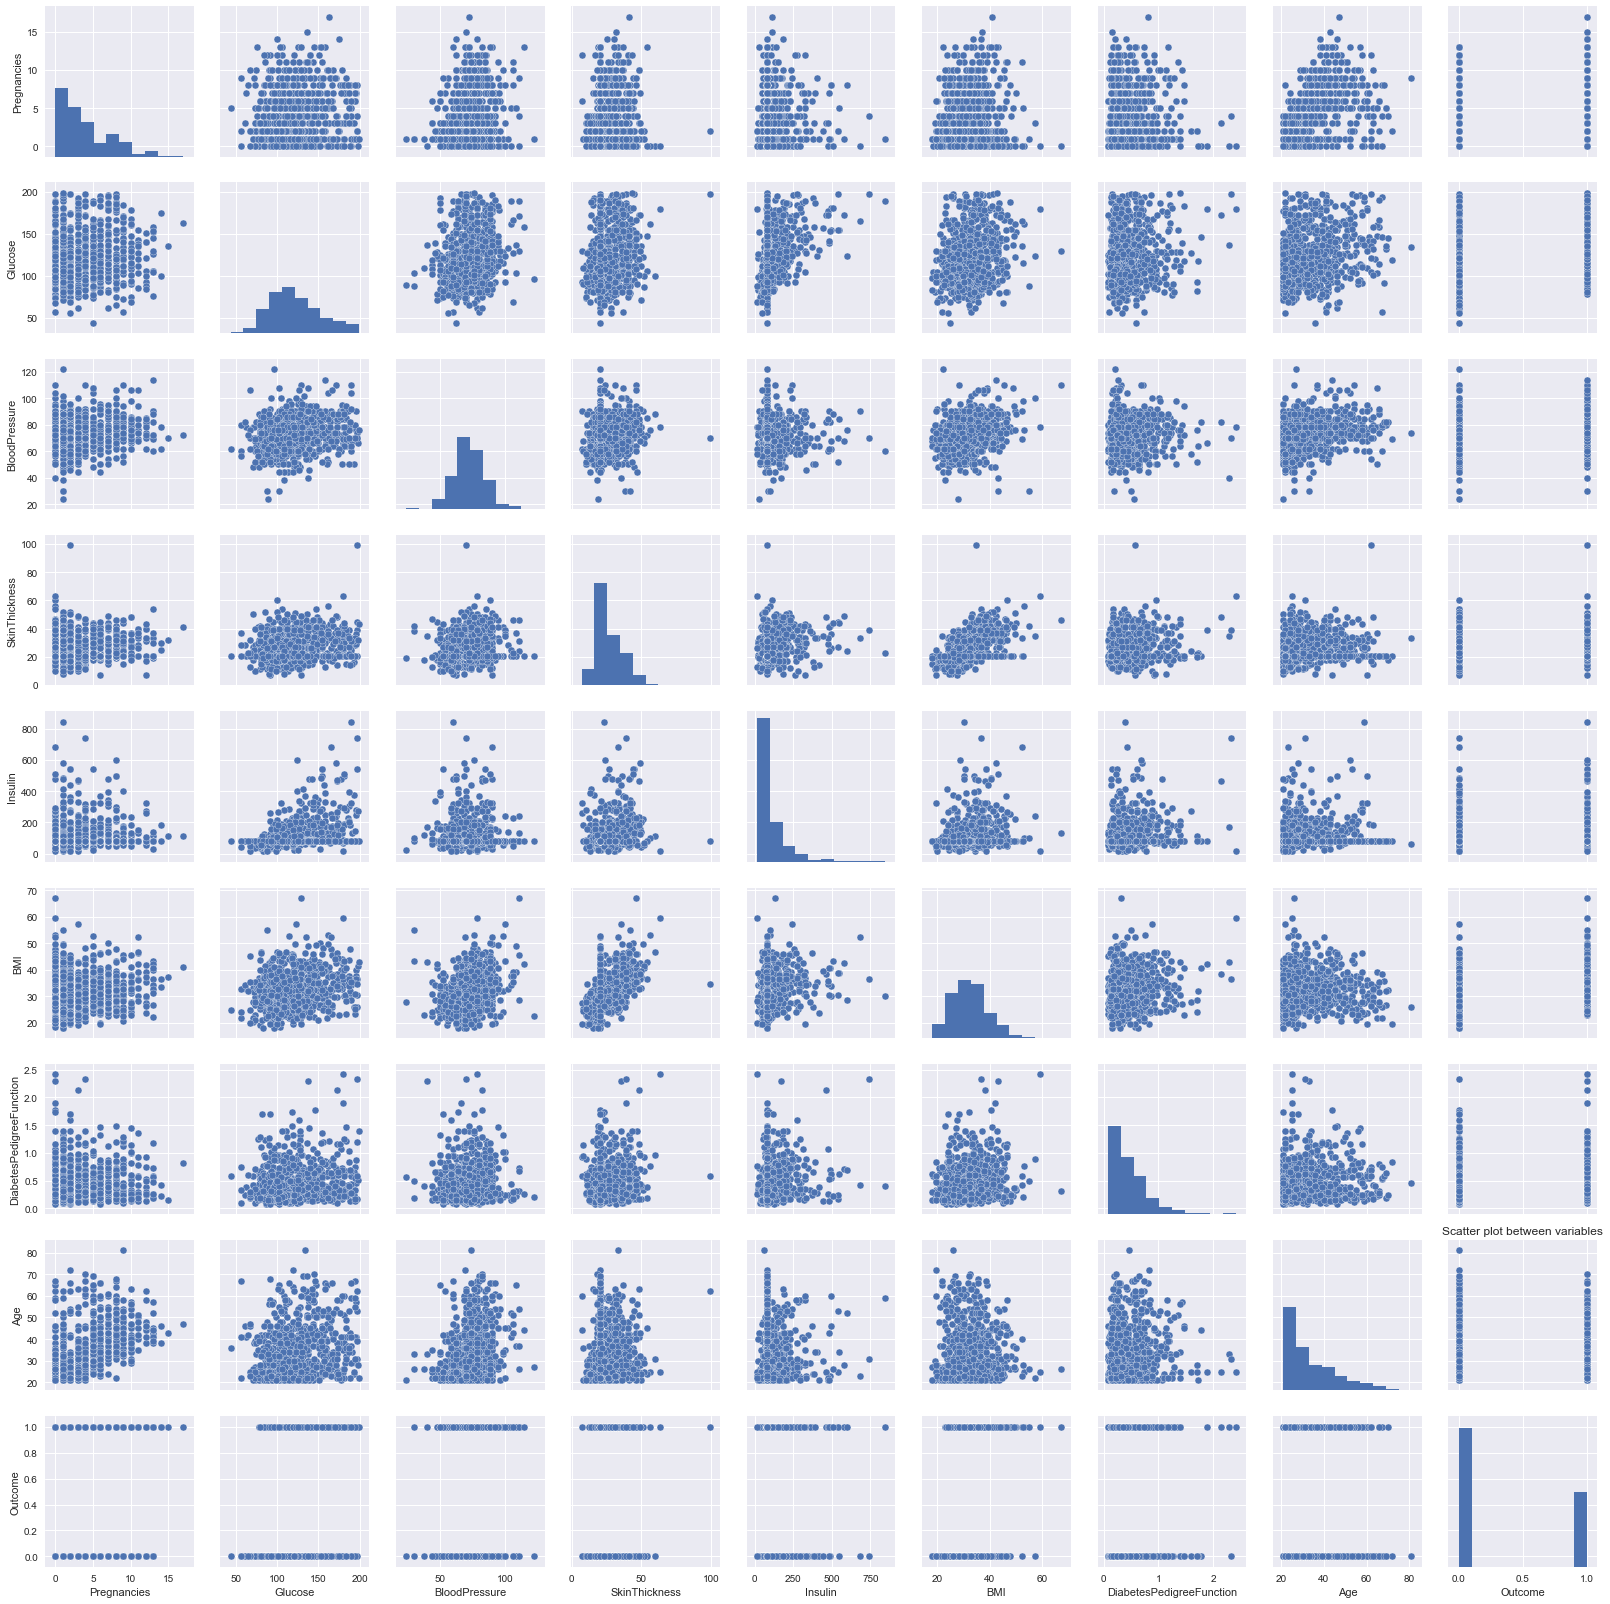

In [36]:
sns.pairplot(df)
plt.title('Scatter plot between variables')

### 3. Perform correlation analysis. Visually explore it using a heat map

In [37]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.021546                 -0.033523   
Glucose                   0.396597  0.231478                  0.137106   
BloodPressure             0.010926  0.281231                  0.000371   
SkinThickness             0.240361  0.535703                  0.154961   
Insulin                   1.000000  0.189856                  0.157806   
BMI                       0.189856  1.000000                  0.153508   
DiabetesPedigreeFunction  0.157806  0.153508                  1.000000   
Age                       0.038652  0.025748                  0.033561   
Outcome                   0.179185  0.312254                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266600  0.492908  
BloodPressure             0.326740  0.162986  
SkinThickness             0.026423  0.175026  
Insulin                   0.038652  0.179185  
BMI                       0.025748  0.312254  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [38]:
#correlation analysis

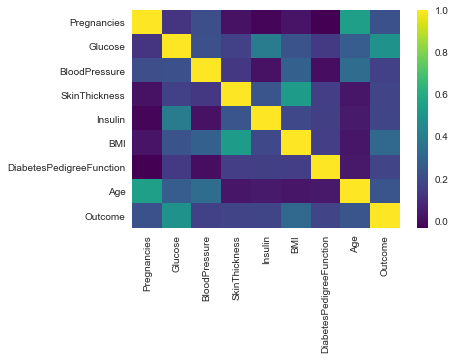

In [39]:
sns.heatmap(df.corr(),cmap='viridis')

# Project Task: Week 3
### Data Modeling:

### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

In [55]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [56]:
from sklearn.preprocessing import StandardScaler
Scale=StandardScaler()
x_train_std=Scale.fit_transform(x_train)
x_test_std=Scale.transform(x_test)

In [57]:
norm=lambda a:(a-min(a))/(max(a)-min(a))
df_norm=df.iloc[:,:-1]
df_normalized=df_norm.apply(norm)

In [58]:
x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(df_normalized.values,y,test_size=0.20,random_state=0)

### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.
Since the data has its outcome or target variable in categorical form (1 0r 0 = diabetic or non-diabetic) and categorical values use classification. The classification models used in this project are Logistic Regression, KNN, Random Forest.

# Project Task: Week 4

### 1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier() 
knn_model.fit(x_train_std,y_train)
knn_pred=knn_model.predict(x_test_std)

In [63]:
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')

Accuracy Score of KNN Model::
0.8020833333333334

 Classification Report::
             precision    recall  f1-score   support

          0       0.88      0.85      0.86       140
          1       0.62      0.67      0.65        52

avg / total       0.81      0.80      0.80       192
 



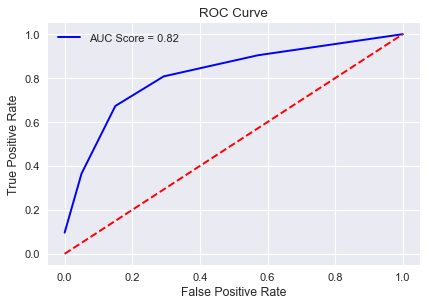

In [64]:
knn_prob=knn_model.predict_proba(x_test_std)
knn_prob=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob)
roc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [65]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.01) 
lr_model.fit(x_train_std,y_train)
lr_pred=lr_model.predict(x_test_std)

In [66]:
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,lr_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,lr_pred),'\n')

Accuracy Score of Logistic Regression Model::
0.8072916666666666

 Classification Report::
             precision    recall  f1-score   support

          0       0.87      0.86      0.87       140
          1       0.64      0.65      0.65        52

avg / total       0.81      0.81      0.81       192
 



In [67]:
lr_prob=lr_model.predict_proba(x_test_std)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500,random_state=0)
rf_model.fit(x_train_std,y_train)
rf_pred=rf_model.predict(x_test_std)

In [82]:
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,rf_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,rf_pred),'\n')

Accuracy Score of Logistic Regression Model::
0.8229166666666666

 Classification Report::
             precision    recall  f1-score   support

          0       0.87      0.89      0.88       140
          1       0.69      0.63      0.66        52

avg / total       0.82      0.82      0.82       192
 



In [83]:
rf_prob=rf_model.predict_proba(x_test_std)
rf_prob=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,rf_prob)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

**Considering accuracy of the model, sensitivity, specificity and AUC (ROC curve), Random Forest model is the one that is better model compared to other two models.**



### Data Reporting:

### 2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

**Find the dashboard in the tableau in the link mentioned below: https://public.tableau.com/profile/keerthana.sudina#!/vizhome/capstone-dashboard/Dashboard1?publish=yes**